<a href="https://colab.research.google.com/github/GUILLENJV/Series-de-Tiempo-/blob/master/Predecir_el_precio_de_Bitcoin_con_redes_neuronales_recurrentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predecir el precio de Bitcoin con Redes Neuronales Recurrentes

¿Quién no ha oído hablar del dinero digital más famoso del mundo, la criptomoneda de la década? Así es, estoy hablando de Bitcoin . Todo el mundo habla de Bitcoin y de lo que sucederá con su precio récord, incluidas marcas financieras famosas como JPMorgan y Morgan Stanley . Este año, Bitcoin informó su precio más alto de todos los tiempos de $ 61,556.59 en marzo de 2021, según CoinDesk 20.

La pregunta más importante es, por supuesto, qué pasará con el precio de este dinero mágico. Esta es una pregunta para la que nadie tiene una respuesta segura porque predecir el precio exacto de Bitcoin, o de hecho, cualquier otro instrumento financiero, es casi imposible. Sin embargo, lo que podemos hacer es utilizar técnicas de ciencia de datos para predecir el precio de Bitcoin con alta precisión y eso es exactamente lo que vamos a hacer en este artículo. Construiremos un modelo de aprendizaje profundo que utilizará los datos históricos de Bitcoin para predecir su precio.

Al final de este artículo, aprenderá sobre:
* Aprendizaje profundo (RNN, LSTM)
* Preprocesamiento de datos
* Evaluación del modelo de predicción de precios de Bitcoin


# Sobre Bitcoin
Bitcoin ofrece transferencias de dinero eficientes a través de Internet y está controlado por una red descentralizada con un conjunto transparente de reglas y funciona como una alternativa al dinero fiduciario controlado por el banco central. La tecnología clave detrás de esta criptomoneda es el fenómeno de blockchain, que es una lista creciente de registros ( bloques) vinculados mediante criptografía donde cada bloque contiene un hash criptográfico del bloque anterior, una marca de tiempo y datos de transacciones.

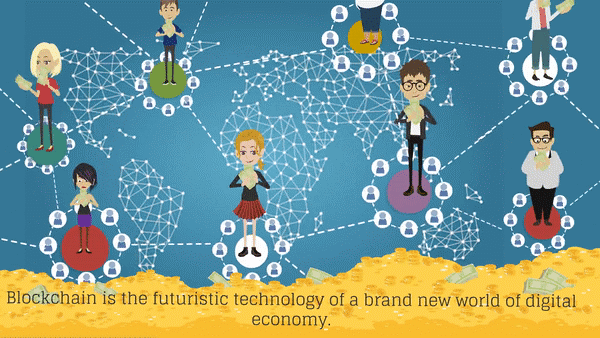

Por diseño, una cadena de bloques no se puede modificar porque una vez que se registra, los datos de un bloque determinado no se pueden modificar posteriormente sin alterar todos los bloques posteriores . Por lo tanto, cualquier cambio en un solo bloque hará que todos los siguientes bloques en una cadena de bloques no sean válidos, lo que hace obvio que los datos originales han sido manipulados.

#Datos históricos de precios de Bitcoin
Para entrenar nuestro modelo de precios, utilizamos los datos de precios públicos de Bitcoin informados en el período 2016-2020, 5 años de datos financieros descargados de Yahoo Finance . Para evaluar nuestro modelo, utilizamos datos de precios de Bitcoin en el período de enero de 2021 a marzo de 2021. Usamos el modelo para predecir los precios de Bitcoin para este período y compararlo con los precios reales para comprender qué tan bien fue capaz de predecir el modelo. los precios.

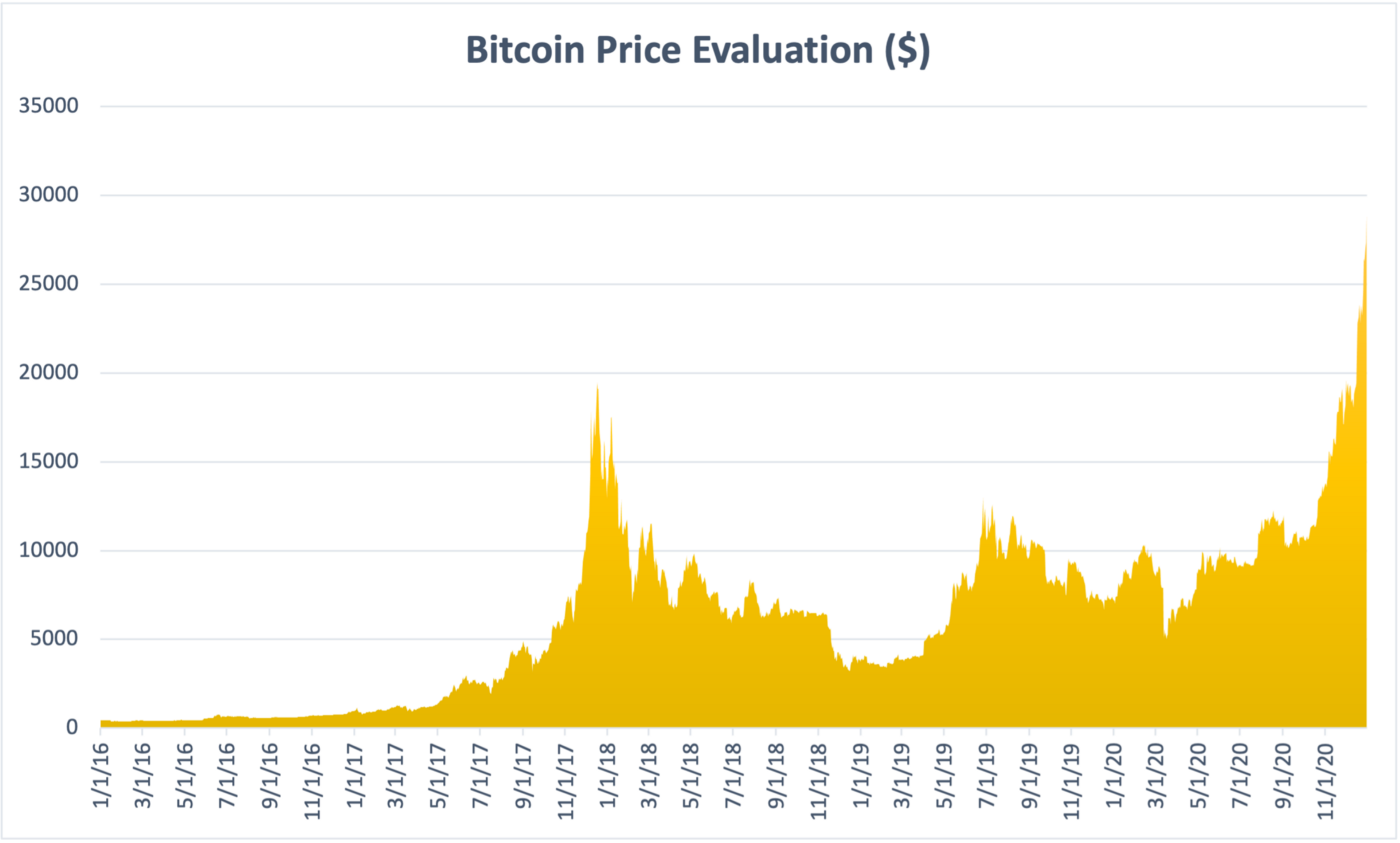

# Preprocesamiento de datos
**Paso 1: Normalización** Nuestro modelo se basa en RNN con capas LSTM que utiliza la función de activación sigmoidea para transformar vectores de entrada en vectores con entradas que tienen un valor en un rango de [0,1]. Por lo tanto, usamos la normalización para escalar las características del modelo dado que el denominador siempre será mayor que el nominador, el valor de salida siempre será un número entre 0 y 1.

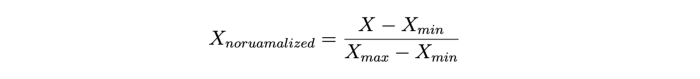

**Paso 2: Transformación de datos** Para el RNN, hacemos una suposición con respecto al número de períodos de tiempo que el modelo necesita para retroceder en el tiempo para conocer el período de tiempo actual. Dado que en general hay 30 días en un mes, 3 meses, es decir, 90 días, el período de tiempo parece una suposición razonable para que nuestro modelo RNN aprenda de los precios de Bitcoin en el pasado. Por lo tanto, por precio, X_train contendrá los precios de Bitcoin de los últimos 60 días y Y_train será el precio de Bitcoin de ese día y esto se mantiene para todos los períodos de tiempo.

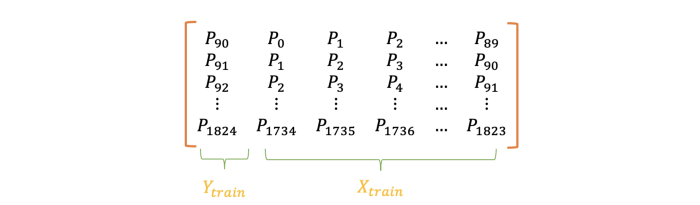

**Paso 3: Dar forma a los datos** Agregar una dimensión adicional al modelo que permitirá usar indicadores adicionales que ayuden a predecir el precio (por ejemplo, eventos externos que causan ansiedad en el público). De esta forma transformamos los datos de 2D a 3D.

# Aprendizaje profundo
Toda la idea detrás del Deep Learning es imitar las capacidades funcionales del cerebro humano. Si las redes neuronales artificiales (ANN) son responsables de la memoria a largo plazo, como el lóbulo temporal de nuestro cerebro, y si las redes neuronales convolucionales (CNN) son responsables del reconocimiento de imágenes y la interpretación visual, como el lóbulo occipital de nuestro cerebro, entonces las redes neuronales recurrentes (RNN) son responsables de la memoria a corto plazo, como el lóbulo frontal de nuestro cerebro.

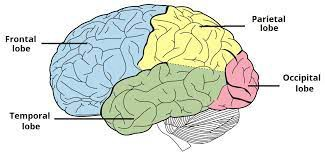

# Redes neuronales recurrentes (RNN)
Por un lado, la información fluye desde las capas de entrada a la capa de salida y, por otro lado, el error calculado se propaga nuevamente a través de la red para actualizar los pesos. A diferencia de ANN y CNN, en el caso de RNN, las capas ocultas no solo dan una salida, sino que también se alimentan a sí mismas.

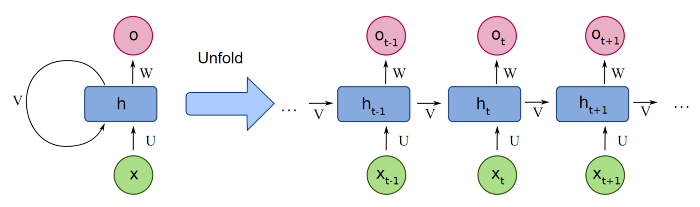

Lo que hace RNN es traducir las características de entrada proporcionadas a vectores legibles por máquina. Luego, el sistema procesa cada una de esta secuencia de vectores uno por uno, pasando del primer vector al siguiente en orden secuencial. Mientras procesa, el sistema pasa la información a través del estado oculto (estado de memoria) al siguiente paso de esta secuencia.

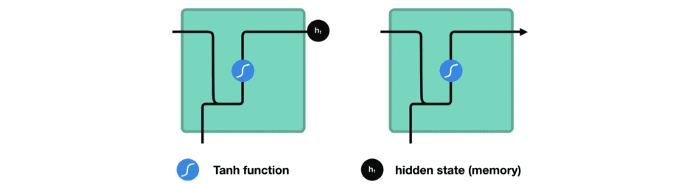

Una vez que el estado oculto ha recopilado toda la información existente en el sistema de los pasos anteriores, está listo para avanzar al siguiente paso y combinar esta información con la entrada de este paso actual (Xt) para formar un nuevo vector de información.

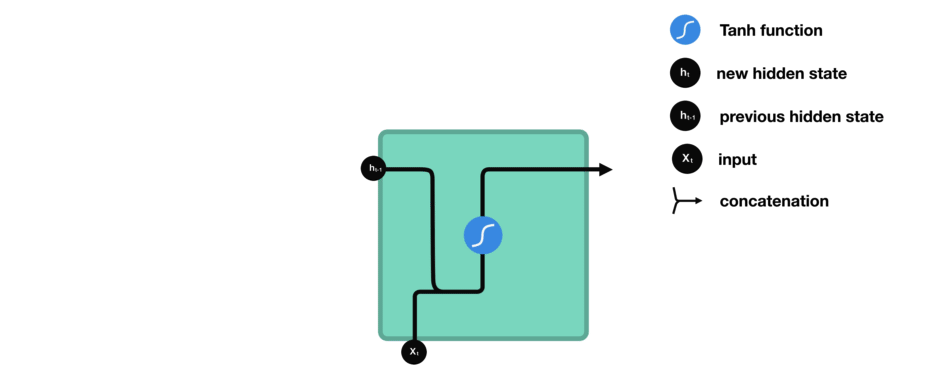

#Memorias a corto plazo ( LSTM )
Al entrenar un modelo RNN, durante el proceso de optimización, en la época inicial, los pesos son valores elegidos al azar y en caso de que estos valores elegidos sean muy pequeños, multiplicándolos con el mismo peso recurrente muchas veces, el gradiente se vuelve cada vez menor. y en algún momento el degradado desaparece. Entonces, cuanto menor sea el gradiente, más difícil será actualizar el peso, lo que significa que más lento será el proceso de optimización.

Además, hay un efecto dominó y un peso actualizado incorrectamente afecta el cálculo de los pesos restantes y también los hace inexactos, dado que todos los pesos están relacionados. Este problema en las RNN se conoce como **Problema de gradiente de fuga** y las memorias a corto plazo ( LSTM ) están resolviendo este problema de las RNN. La diferencia entre el RNN y el LSTM habituales es el conjunto de operaciones que se realizan en la información pasada y el valor de entrada en ese paso específico. La información en los LSTM fluye a través de sus puertas:
* **puerta de olvido**: una puerta que decide qué información debe desecharse o guardarse
* **puerta de entrada**: una puerta para actualizar el estado de la celda
* **estado de la celda**: una puerta para actualizar el estado de la celda a nuevos valores que la red considere relevantes
* **puerta de salida**: una puerta para decidir cuál debería ser el siguiente estado oculto

#Construyendo un modelo de precios de Bitcoin
El objetivo es predecir los precios de las acciones, que es un valor de producción continuo, por lo que tenemos un problema de regresión en lugar de clasificación. Inicializamos este regresor como un objeto con capas secuenciales para lo cual usamos el módulo Sequential de Keras que permite crear un objeto Neural Network con capas secuenciales. Luego, agregamos capas de LSTM y dado que predecir el precio de un producto financiero es una tarea bastante compleja, nos gusta tener un modelo con alta dimensionalidad que pueda capturar tendencias al alza y a la baja en el precio de las acciones, por lo que usamos gran cantidad de LSTM unidades por capa LSTM y usamos múltiples capas LSTM. Además, agregamos una capa Dropout , para que la regularización ignore parte de las neuronas en las capas LSTM. Finalmente, usamos el Dense módulo para agregar una capa de salida

In [ ]:
# importamos las librerias
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import tensorflow as tf

In [ ]:
# Importamos y escalamos los datos
dataset_train = pd.read_csv("Bitcoin_Stock_Price_Trainset.csv")


In [ ]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/1/16,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
1,1/2/16,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2,1/3/16,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
3,1/4/16,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
4,1/5/16,433.069000,434.182007,429.675995,431.959991,431.959991,34522600


In [ ]:
dataset_train.shape

(1823, 7)

In [ ]:
#seleccionando la columna de la derecha (necesitamos todas las filas y la columna 1): matriz numpy
training_set = dataset_train.iloc[:,1:2].values
print(training_set)

[[  430.721008]
 [  434.622009]
 [  433.578003]
 ...
 [27081.81055 ]
 [27360.08984 ]
 [28841.57422 ]]


In [ ]:
# Escalado de funciones
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled[0,:])

[0.00230534]


In [ ]:
training_set_scaled.size

1823

In [ ]:
#creando una estructura de datos con 60 pasos de tiempo y 1 salida
X_train  = []
y_train  = []

for i in range(90,training_set_scaled.size):
    # agregando los 60 precios de las acciones anteriores a la lista para i
    # Necesitamos especificar las filas y simplemente elegir la primera y única columna
    X_train.append(training_set_scaled[i-90:i, 0])
    # agregando el precio de la acción número 60 a la lista para i
    y_train.append(training_set_scaled[i, 0])
# transformar listas de pandas en matrices numerosas requeridas para el RNN
X_train, y_train = np.array(X_train), np.array(y_train)
print (X_train)

[[0.00230534 0.00244233 0.00240567 ... 0.0021588  0.00208    0.00181767]
 [0.00244233 0.00240567 0.00228216 ... 0.00208    0.00181767 0.00176229]
 [0.00240567 0.00228216 0.00238779 ... 0.00181767 0.00176229 0.00181508]
 ...
 [0.36478732 0.36544407 0.36336591 ... 0.85375456 0.91564269 0.91007491]
 [0.36544407 0.36336591 0.36803461 ... 0.91564269 0.91007491 0.93820295]
 [0.36336591 0.36803461 0.36591355 ... 0.91007491 0.93820295 0.9479752 ]]


In [ ]:
X_train.shape

(1733, 90)

In [ ]:
y_train.shape

(1733,)

In [ ]:
print(y_train)

[0.00176229 0.00181508 0.00187344 ... 0.93820295 0.9479752  1.        ]


In [ ]:
# Dar forma / agregar nuevas dimensiones para permitir agregar más indicadores: de 2D a 3D
# 3 argumentos de entrada
# batch_size: número de observaciones
# timesteps: número de columnas
# input_dim: número de predictores
X_train = np.reshape(X_train, [X_train.shape[0], X_train.shape[1], 1])
print (X_train)


[[[0.00230534]
  [0.00244233]
  [0.00240567]
  ...
  [0.0021588 ]
  [0.00208   ]
  [0.00181767]]

 [[0.00244233]
  [0.00240567]
  [0.00228216]
  ...
  [0.00208   ]
  [0.00181767]
  [0.00176229]]

 [[0.00240567]
  [0.00228216]
  [0.00238779]
  ...
  [0.00181767]
  [0.00176229]
  [0.00181508]]

 ...

 [[0.36478732]
  [0.36544407]
  [0.36336591]
  ...
  [0.85375456]
  [0.91564269]
  [0.91007491]]

 [[0.36544407]
  [0.36336591]
  [0.36803461]
  ...
  [0.91564269]
  [0.91007491]
  [0.93820295]]

 [[0.36336591]
  [0.36803461]
  [0.36591355]
  ...
  [0.91007491]
  [0.93820295]
  [0.9479752 ]]]


In [ ]:
X_train.shape

(1733, 90, 1)

In [ ]:
# --------------------- Modelo de construcción RNN / LSTM -------------------- #
#Inicializando el RNN

# variable independiente es una secuencia de capas: regresión y sin clasificación dado el valor de salida continuo
regressor = Sequential()
# ------------------------------------------------- ----------------- #
# Añadiendo la primera capa LSTM
# ------------------------------------------------- ----------------- #

# 3 entradas
# número de unidades de memoria / LSTM o neuronas en cada LSTM
# vb binario para indicar si se agregarán más capas de LSTM al modelo
# forma de entrada (toma automáticamente la primera dimensión, por lo que solo es necesario especificar el resarcimiento)
print(X_train.shape[1])
regressor.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1], 1)))


90


In [ ]:
# agregando capas de regularización de abandono
# Entrada n. ° 1: cantidad de neuronas a ignorar en las capas
regressor.add(Dropout(0.2))

In [ ]:
# ------------------------------------------------- ----------------- #
# Añadiendo la segunda capa LSTM
# ------------------------------------------------- ----------------- #
# no se necesita forma de entrada dado que se especifica en la capa anterior
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

In [ ]:
# ------------------------------------------------- ----------------- #
# Añadiendo la tercera capa LSTM
# ------------------------------------------------- ----------------- #
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

In [ ]:
# ------------------------------------------------- ----------------- #
# Añadiendo la cuarta capa LSTM
# ------------------------------------------------- ----------------- #
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

In [ ]:
# ------------------------------------------------- ----------------- #
# Añadiendo la quinta capa LSTM
# ------------------------------------------------- ----------------- #
# tenga en cuenta que esta es la capa LSTM final, por lo tanto, cambiamos el argumento binario a Falso
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [ ]:
# ------------------------------------------------- ----------------- #
# Agregar capa de salida a la RNN para hacer una NN completamente conectada
# ------------------------------------------------- ----------------- #
# salida real unidimensional
regressor.add(Dense(units = 1))

In [ ]:
# --------------------- Compilando el modelo RNN -------------------- #
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
# --------------------- Modelo de entrenamiento RNN -------------------- #
#conectando el regresor construido al modelo de entrenamiento
history=regressor.fit(X_train, y_train, epochs = 120, batch_size = 32)

Epoch 1/120
55/55 [==============================] - 22s 20ms/step - loss: 0.0195
Epoch 2/120
55/55 [==============================] - 1s 18ms/step - loss: 0.0041
Epoch 3/120
55/55 [==============================] - 1s 18ms/step - loss: 0.0027
Epoch 4/120
55/55 [==============================] - 1s 18ms/step - loss: 0.0024
Epoch 5/120
55/55 [==============================] - 1s 19ms/step - loss: 0.0024
Epoch 6/120
55/55 [==============================] - 1s 18ms/step - loss: 0.0022
Epoch 7/120
55/55 [==============================] - 1s 19ms/step - loss: 0.0020
Epoch 8/120
55/55 [==============================] - 1s 18ms/step - loss: 0.0015
Epoch 9/120
55/55 [==============================] - 1s 18ms/step - loss: 0.0019
Epoch 10/120
55/55 [==============================] - 1s 18ms/step - loss: 0.0020
Epoch 11/120
55/55 [==============================] - 1s 18ms/step - loss: 0.0014
Epoch 12/120
55/55 [==============================] - 1s 18ms/step - loss: 0.0015
Epoch 13/120
55/55 [====

In [ ]:
import matplotlib.pyplot as mtlplt
import matplotlib.pylab as plt
from matplotlib import pyplot

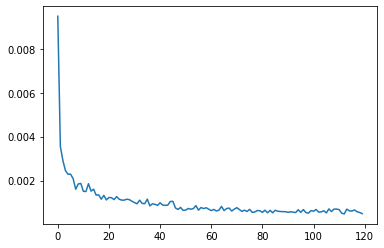

In [ ]:
# plot history
pyplot.plot(history.history['loss'], label='train')

In [ ]:
# --------------------- Prueba del modelo RNN -------------------- #
dataset_test = pd.read_csv("Bitcoin_Stock_Price_Testset.csv")
# precios de las acciones reales
real_stock_price = dataset_test.iloc[:,1:2].values
# predecir los precios de las acciones usando X_test
# necesitamos los datos de entrenamiento originales (concatenación vertical 0, horizontal 1)
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
print(real_stock_price)

[[28994.00977]
 [29376.45508]
 [32129.4082 ]
 [32810.94922]
 [31977.04102]
 [34013.61328]
 [36833.875  ]
 [39381.76563]
 [40788.64063]
 [40254.21875]
 [38346.53125]
 [35516.35938]
 [33915.12109]
 [37325.10938]
 [39156.70703]
 [36821.64844]
 [36163.64844]
 [35792.23828]
 [36642.23438]
 [36050.11328]
 [35549.39844]
 [30817.625  ]
 [32985.75781]
 [32064.37695]
 [32285.79883]
 [32358.61328]
 [32564.0293 ]
 [30441.04102]
 [34318.67188]
 [34295.93359]
 [34270.87891]
 [33114.57813]
 [33533.19922]
 [35510.82031]
 [37475.10547]
 [36931.54688]
 [38138.38672]
 [39250.19141]
 [38886.82813]
 [46184.99219]
 [46469.76172]
 [44898.71094]
 [47877.03516]
 [47491.20313]
 [47114.50781]
 [48696.53516]
 [47944.45703]
 [49207.27734]
 [52140.97266]
 [51675.98047]
 [55887.33594]
 [56068.56641]
 [57532.73828]
 [54204.92969]
 [48835.08594]
 [49709.08203]
 [47180.46484]
 [46344.77344]
 [46194.01563]
 [        nan]]


In [ ]:
# para la consistencia del modelo, necesitamos tener la misma escala en la prueba que en el entrenamiento
# para el primer día de prueba, necesitamos los datos de los 60 días anteriores del tren
print("Primer día financiero en 2021, cuando comienza el período de prueba",len(dataset_total)- len(dataset_test))
print("Primer día financiero en 2021 menos 60 días" ,len(dataset_total)- len(dataset_test) - 90)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 90:].values

Primer día financiero en 2021, cuando comienza el período de prueba 1823
Primer día financiero en 2021 menos 60 días 1733


In [ ]:
# remodelación, normalización de las entradas
inputs = inputs.reshape(-1,1)
# ya no encaja, solo se transforma
inputs = sc.transform(inputs)

In [ ]:
#almacenamiento de datos de prueba como hicimos en el entrenamiento
X_test = []
y_test = []
for i in range(90,inputs.size):
    X_test.append(inputs[i-90:i, 0])
    y_test.append(inputs[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
#adding extra dimension
X_test = np.reshape(X_test, [X_test.shape[0], X_test.shape[1], 1])

In [ ]:
X_test.shape

(60, 90, 1)

In [ ]:
print(X_test)

[[[0.36803461]
  [0.36591355]
  [0.36027311]
  ...
  [0.93820295]
  [0.9479752 ]
  [1.        ]]

 [[0.36591355]
  [0.36027311]
  [0.35884793]
  ...
  [0.9479752 ]
  [1.        ]
  [1.00535303]]

 [[0.36027311]
  [0.35884793]
  [0.35829005]
  ...
  [1.        ]
  [1.00535303]
  [1.01878324]]

 ...

 [[0.60943448]
  [0.62554206]
  [0.67665253]
  ...
  [1.70210563]
  [1.73279746]
  [1.64400084]]

 [[0.62554206]
  [0.67665253]
  [0.64743456]
  ...
  [1.73279746]
  [1.64400084]
  [1.61465413]]

 [[0.67665253]
  [0.64743456]
  [0.66162808]
  ...
  [1.64400084]
  [1.61465413]
  [1.60936002]]]


In [ ]:
y_test.shape

(60,)

In [ ]:
print(y_test)

[1.00535303 1.01878324 1.11545779 1.13939125 1.11010716 1.18162481
 1.28066302 1.37013646 1.41954123 1.40077411 1.33378247 1.23439625
 1.17816609 1.29791354 1.36223315 1.28023366 1.25712689 1.2440842
 1.27393324 1.25313991 1.23555647 1.06939233 1.14552994 1.11317411
 1.12094971 1.12350671 1.13072024 1.05616795 1.19233745 1.19153896
 1.19065912 1.15005368 1.16475426 1.23420174 1.3031809  1.28409293
 1.32647313 1.36551601 1.3527559  1.60904315 1.61904331 1.56387323
 1.66846207 1.65491293 1.64168465 1.69724018 1.6708297  1.71517575
 1.81819737 1.80186839 1.94975719 1.9561214  2.00753824 1.89067668
 1.70210563 1.73279746 1.64400084 1.61465413 1.60936002        nan]


In [ ]:
#obtención de valores predichos
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
# --------------------- Modelo de entrenamiento RNN -------------------- #
#conectando el regresor construido al modelo de entrenamiento
history1=regressor.fit(X_train, y_train, epochs = 120, batch_size = 32, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Epoch 1/120
55/55 - 3s - loss: 0.0022 - val_loss: nan
Epoch 2/120
55/55 - 1s - loss: 0.0026 - val_loss: nan
Epoch 3/120
55/55 - 1s - loss: 0.0959 - val_loss: nan
Epoch 4/120
55/55 - 1s - loss: 0.0195 - val_loss: nan
Epoch 5/120
55/55 - 1s - loss: 0.0211 - val_loss: nan
Epoch 6/120
55/55 - 1s - loss: 0.0257 - val_loss: nan
Epoch 7/120
55/55 - 1s - loss: 0.0172 - val_loss: nan
Epoch 8/120
55/55 - 1s - loss: 0.0077 - val_loss: nan
Epoch 9/120
55/55 - 1s - loss: 0.0058 - val_loss: nan
Epoch 10/120
55/55 - 1s - loss: 0.0039 - val_loss: nan
Epoch 11/120
55/55 - 1s - loss: 0.0027 - val_loss: nan
Epoch 12/120
55/55 - 1s - loss: 0.0021 - val_loss: nan
Epoch 13/120
55/55 - 1s - loss: 0.0025 - val_loss: nan
Epoch 14/120
55/55 - 1s - loss: 0.0028 - val_loss: nan
Epoch 15/120
55/55 - 1s - loss: 0.0026 - val_loss: nan
Epoch 16/120
55/55 - 1s - loss: 0.0026 - val_loss: nan
Epoch 17/120
55/55 - 1s - loss: 0.0020 - val_loss: nan
Epoch 18/120
55/55 - 1s - loss: 0.0028 - val_loss: nan
Epoch 19/120
55/55 

KeyboardInterrupt: ignored

In [ ]:
#creando una estructura de datos con 60 pasos de tiempo y 1 salida
X_train  = []
y_train  = []

for i in range(90,training_set_scaled.size):
    # agregando los 60 precios de las acciones anteriores a la lista para i
    # Necesitamos especificar las filas y simplemente elegir la primera y única columna
    X_train.append(training_set_scaled[i-90:i, 0])
    # agregando el precio de la acción número 60 a la lista para i
    y_train.append(training_set_scaled[i, 0])
# transformar listas de pandas en matrices numerosas requeridas para el RNN
X_train, y_train = np.array(X_train), np.array(y_train)
print (X_train)

In [ ]:
X_train.shape

(1733, 90, 1)

In [ ]:
y_train.shape

(1733,)

In [ ]:
print(y_train)

[0.00176229 0.00181508 0.00187344 ... 0.93820295 0.9479752  1.        ]


# Predicciones del modelo de precios de Bitcoin
Una vez que se entrena el modelo de precios, lo usamos en combinación con los datos de prueba para generar las predicciones de precios de Bitcoin para el período de prueba, de enero de 2021 a marzo de 2021, que luego comparamos con los precios reales de Bitcoin informados en el mismo período de tiempo.
Como podemos ver, nuestro modelo RNN basado en múltiples capas de LSTM, fue capaz de predecir adecuadamente las tendencias ascendentes y descendentes porque vemos que la línea azul correspondiente a los precios predichos de Bitcoin sigue el mismo patrón que la línea amarilla que corresponde a los precios reales de Bitcoin.

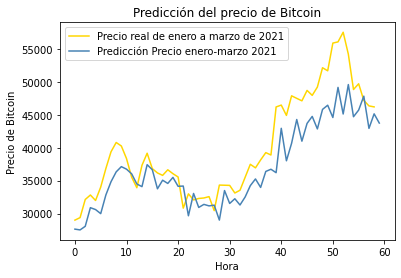

In [ ]:
# --------------------- Visualización de los resultados del modelo RNN -------------------- #
plt.plot(real_stock_price, color = '#ffd700', label = "Precio real de enero a marzo de 2021")
plt.plot(predicted_stock_price, color = '#4782B4', label = "Predicción Precio enero-marzo 2021")
plt.title("Predicción del precio de Bitcoin")
plt.xlabel("Hora")
plt.ylabel("Precio de Bitcoin")
plt.legend()
plt.show()

https://github.com/TatevKaren/recurrent-neural-network-pricing-model/blob/main/Bitcoin_Pricing_Model.py

In [ ]:
# Warnings
import warnings
warnings.filterwarnings('ignore')
# biblioteca matemática para la función matemática
import math
# vista de datos etiquetados en dataframe
import pandas as pd
# el lector de datos od panda se utiliza para obtener los datos de la web
import pandas_datareader as web
# numpy se utiliza para crear matrices multidimensionales
import numpy as np
# tensorflow se utiliza para crear el modelo DL y envolver las otras bibliotecas
import tensorflow as tf
# sklearn proporciona funciones de ultilidad para estandarizar o escalar datos
from sklearn.preprocessing import MinMaxScaler
# sklearn proporciona funciones de ultilidad para calcular el error absoluto
from sklearn.metrics import mean_absolute_error
# keras es una biblioteca de redes neuronales
from keras.layers import Dense,Activation,Flatten, Dropout, LSTM
from keras.models import Sequential
from keras.regularizers import l1
# se incluye para crear un área de gràficos
import matplotlib.pyplot as mtlplt
import matplotlib.pylab as plt
from matplotlib import pyplot
# distribución de la escala de características
from matplotlib import rcParams
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('fast')
from pandas import read_csv
import seaborn as sns
import json
import requests
from pandas import concat
from numpy import concatenate
from math import sqrt
from sklearn.metrics import mean_squared_error

In [ ]:
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=USD&limit=2000')
hist = pd.DataFrame(json.loads(res.content)['Data'])
hist = hist.set_index('time')
hist.index = pd.to_datetime(hist.index, unit='s')
target_col = 'close'

In [ ]:
dataset=hist.drop(['volumeto','conversionType', 'volumefrom','conversionSymbol'],axis=1)

In [ ]:
dataset.tail(10)

,high,low,open,close
time,,,,
2021-07-18,32446.17,31131.67,31546.64,31806.30
2021-07-19,31907.17,30487.11,31806.30,30847.55
2021-07-20,31063.88,29320.09,30847.55,29795.55
2021-07-21,32814.13,29513.88,29795.55,32139.48
2021-07-22,32604.40,31738.48,32139.48,32299.47
2021-07-23,33637.93,32012.62,32299.47,33637.92
2021-07-24,34519.75,33429.09,33637.92,34282.56
2021-07-25,35382.63,33892.36,34282.56,35369.93
2021-07-26,40553.85,35270.24,35369.93,37269.52


In [ ]:
dataset_bitcoin = dataset.to_excel("dataset_bitcoin.xlsx")

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 6.4 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=b0a5332ec0f7c18f58012cbefc96c8ce1d6684a4031faab62b592fd64a60148c
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf

In [ ]:
precio = yf.download('FB', start = '2016-01-02', end = '2021-07-27')

[*********************100%***********************]  1 of 1 completed


In [ ]:
print(precio)

                  Open        High  ...   Adj Close    Volume
Date                                ...                      
2016-01-04  101.949997  102.239998  ...  102.220001  37912400
2016-01-05  102.889999  103.709999  ...  102.730003  23258200
2016-01-06  101.129997  103.769997  ...  102.970001  25096200
2016-01-07  100.500000  101.430000  ...   97.919998  45172900
2016-01-08   99.879997  100.500000  ...   97.330002  35402300
...                ...         ...  ...         ...       ...
2021-07-20  338.799988  343.450012  ...  341.660004  11024300
2021-07-21  341.500000  346.519989  ...  346.230011   9279700
2021-07-22  346.679993  351.540009  ...  351.190002  12385400
2021-07-23  360.910004  375.329987  ...  369.790009  33680400
2021-07-26  369.579987  374.440002  ...  372.459991  14910300

[1400 rows x 6 columns]


In [ ]:
precio

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,101.949997,102.239998,99.750000,102.220001,102.220001,37912400
2016-01-05,102.889999,103.709999,101.669998,102.730003,102.730003,23258200
2016-01-06,101.129997,103.769997,100.900002,102.970001,102.970001,25096200
2016-01-07,100.500000,101.430000,97.300003,97.919998,97.919998,45172900
2016-01-08,99.879997,100.500000,97.029999,97.330002,97.330002,35402300
...,...,...,...,...,...,...
2021-07-20,338.799988,343.450012,334.500000,341.660004,341.660004,11024300
2021-07-21,341.500000,346.519989,341.250000,346.230011,346.230011,9279700
2021-07-22,346.679993,351.540009,345.209991,351.190002,351.190002,12385400


In [ ]:
precio_excel = precio.to_excel("df_excel.xlsx")